# Sea ice characteristics 
In this notebook, we highlight key additional sea ice variables from the ICESat-2 dataset: snow depth, ice type, and snow density. We'll use cartopy and xarray to generate maps and lineplots of the data to demonstrate methods for visualizing the data statically, as opposed to the interactive plotting functions highlighted in the sea ice thickness notebook.

In [1]:
import xarray as xr # For working with gridded climate data 
from utils.read_data_utils import read_book_data # Helper function for reading the data from the bucket
from utils.plotting_utils import static_winter_comparison_lineplot, staticArcticMaps, staticArcticMaps_overlayDrifts, interactiveArcticMaps, compute_gridcell_winter_means # Plotting utils 

# Plotting dependencies
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150 # Sets figure size in the notebook

# Remove warnings to improve display
import warnings 
warnings.filterwarnings('ignore') 

# 1) Read in the data 

In [2]:
book_ds = read_book_data() # Read/download the data 

# 2) Interactive winter thickness data maps
Here, we'll use the `interactiveArcticMaps` function to display the data. You can change the variable to display by changing `data_var` in the code cell below if you run the notebook in Binder. 

In [ ]:
data_var = "freeboard_int"
interactiveArcticMaps(book_ds[data_var], frame_width=450)

# 3) Static winter thickness data maps
Compute and map (static) gridcell winter means for given variables

In [3]:
years = [2018,2019,2020] # Years over which to perform analysis

print(compute_gridcell_winter_means.__doc__) # Print docstring

 Compute winter means over the time dimension. Useful for plotting as the grid is maintained. 
    
    Args: 
        da (xr.Dataset or xr.DataArray): data to restrict by time; must contain "time" as a coordinate 
        years (list of str): years over which to compute mean (default to unique years in the dataset)
        year_start (str, optional): year to start time range; if you want Nov 2019 - Apr 2020, set year="2019" (default to the first year in the dataset)
        start_month (str, optional): first month in winter (default to November)
        end_month (str, optional): second month in winter; this is the following calender year after start_month (default to April)
        force_complete_season (bool, optional): require that winter season returns data if and only if all months have data? i.e. if Sep and Oct have no data, return nothing even if Nov-Apr have data? (default to False) 
    
    Returns: 
        merged (xr.DataArray): DataArray with winter means as a time coordi

In [ ]:
print(staticArcticMaps.__doc__) # Print docstring

In [ ]:
freeboard_winter_means = compute_gridcell_winter_means(book_ds.freeboard_int, years=years)
pl = staticArcticMaps(freeboard_winter_means, set_cbarlabel = "Sea ice freeboard (m)", cmap="YlOrRd", vmin=0, vmax=0.8, out_str='freeboard_winter')
display(pl)

In [ ]:
snow_depth_winter_means = compute_gridcell_winter_means(book_ds.snow_depth_int, years=years)
pl = staticArcticMaps(snow_depth_winter_means, set_cbarlabel = "Snow depth (m)", cmap="inferno", vmin=0, vmax=0.5, out_str='snowdepth_winter')
display(pl)

In [ ]:
snow_density_winter_means = compute_gridcell_winter_means(book_ds.snow_density, years=years)
staticArcticMaps(snow_density_winter_means, set_cbarlabel = "Snow density (kg/m3)", cmap="GnBu", vmin=240, vmax=330, out_str='snowdensity_winter')

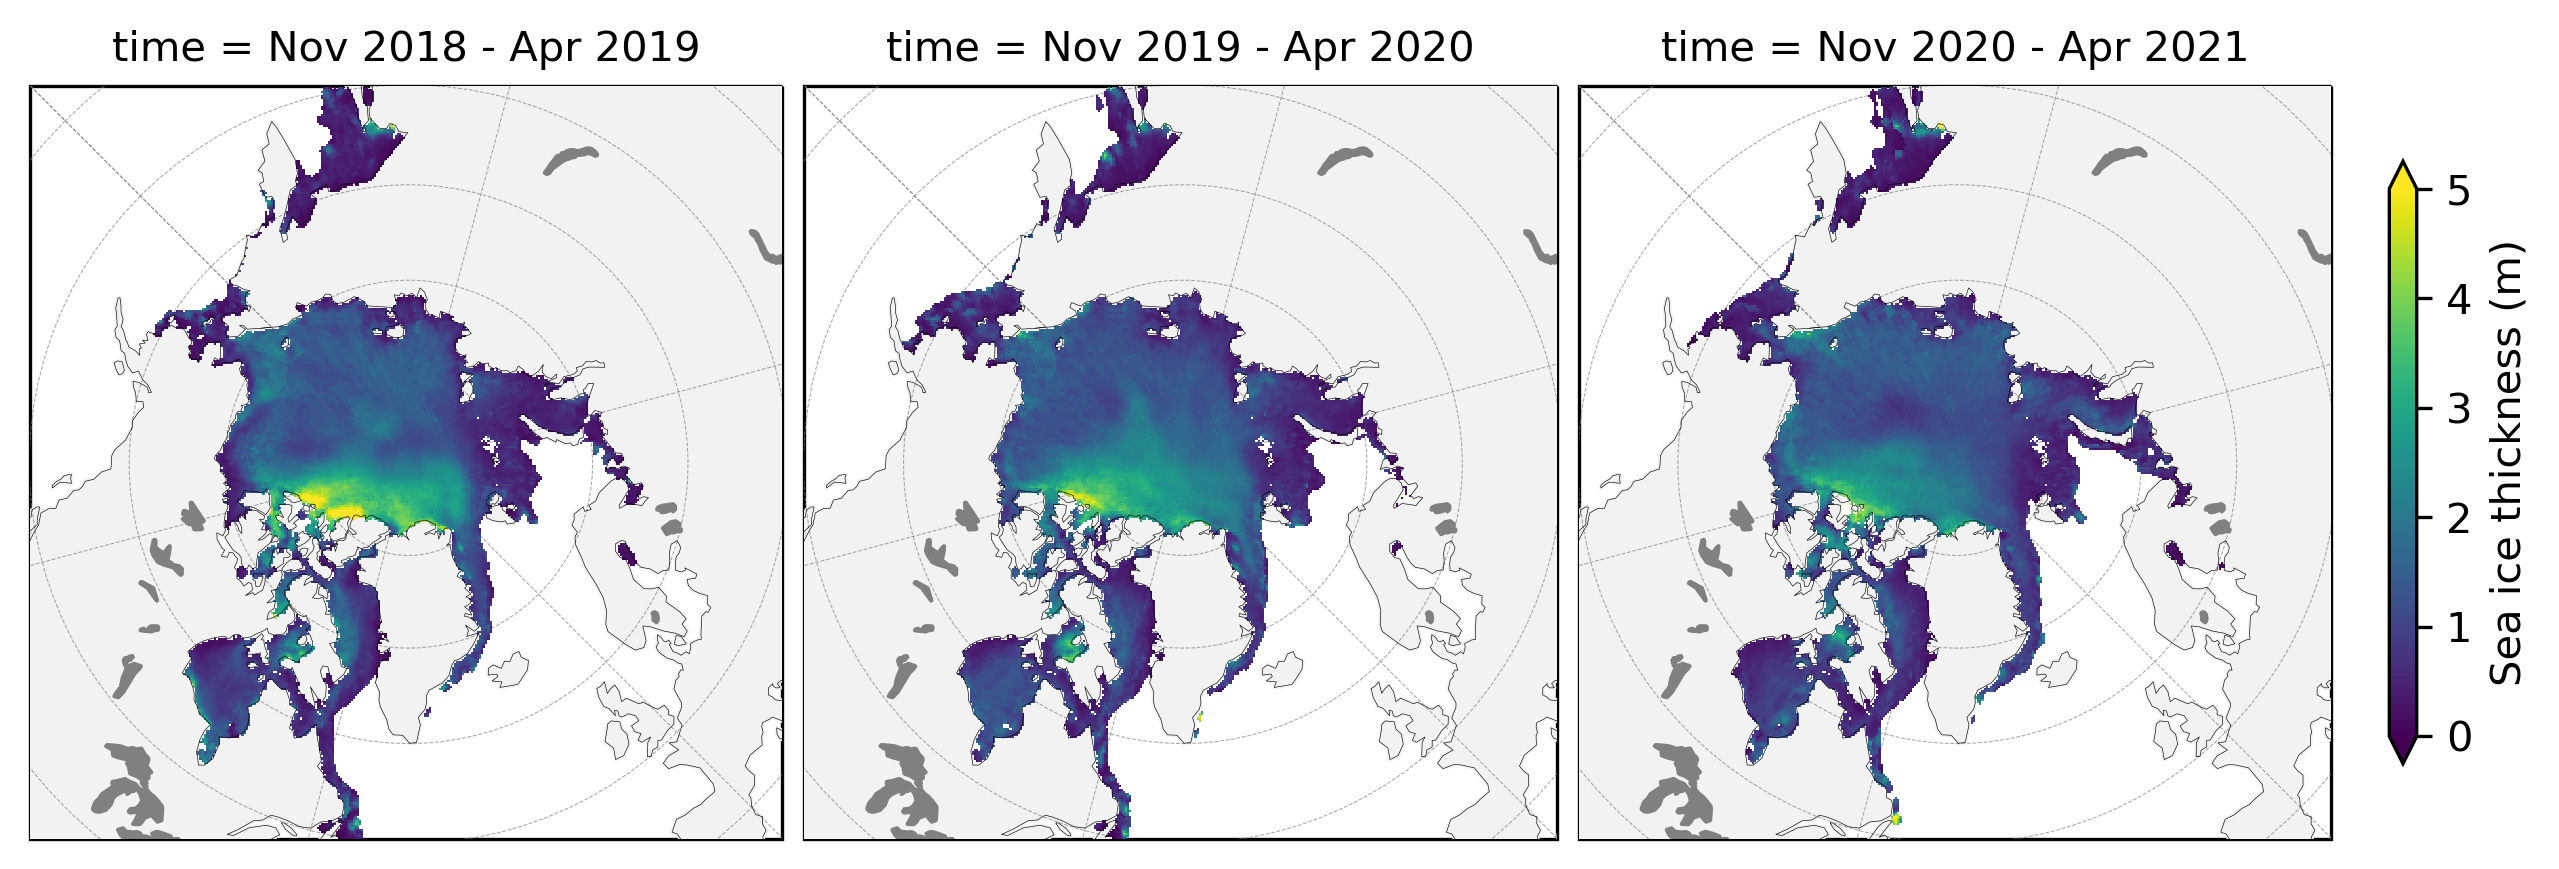

In [7]:
thickness_winter_means = compute_gridcell_winter_means(book_ds.ice_thickness_int, years=years)
pl = staticArcticMaps(thickness_winter_means, title="", set_cbarlabel = "Sea ice thickness (m)", cmap="viridis", vmin=0, vmax=5, out_str='thickness_winter')
display(pl)

In [ ]:
ice_type_winter_means = compute_gridcell_winter_means(book_ds.ice_type, years=years)
pl = staticArcticMaps(ice_type_winter_means, set_cbarlabel = "Sea ice type (0 = FYI, 1 = MYI)", cmap="YlOrRd", vmin=0, vmax=1, out_str='icetype_winter')
display(pl)

In [ ]:
ice_conc_winter_means = compute_gridcell_winter_means(book_ds.sea_ice_conc, years=years)
pl = staticArcticMaps(ice_conc_winter_means, set_cbarlabel = "Sea ice concentration", cmap="Blues_r", vmin=0, vmax=1, out_str='iceconc_winter')
display(pl)

# 4) Static monthly thickness data maps
Compute and map (static) monthly maps for given variables across the three winters

In [ ]:
pl = staticArcticMaps(book_ds.freeboard_int.sel(time=["Nov 2018","Nov 2019","Nov 2020"]), set_cbarlabel = "Sea ice freeboard", cmap="YlOrRd", vmin=0, vmax=0.8, out_str='freeboard_november')
display(pl)

In [ ]:
pl = staticArcticMaps(book_ds.freeboard_int.sel(time=["Apr 2019","Apr 2020","Apr 2021"]), set_cbarlabel = "Sea ice freeboard", cmap="YlOrRd", vmin=0, vmax=0.8, out_str='freeboard_april')
display(pl)

In [ ]:
pl = staticArcticMaps(book_ds.snow_depth_int.sel(time=["Nov 2018","Nov 2019","Nov 2020"]), set_cbarlabel = "Snow depth", cmap="inferno", vmin=0, vmax=0.5, out_str='snowdepth_november')
display(pl)

In [ ]:
pl = staticArcticMaps(book_ds.snow_depth_int.sel(time=["Apr 2019","Apr 2020","Apr 2021"]), set_cbarlabel = "Snow depth", cmap="inferno", vmin=0, vmax=0.5, out_str='snowdepth_april')
display(pl)

In [ ]:
pl = staticArcticMaps(book_ds.ice_thickness_int.sel(time=["Nov 2018","Nov 2019","Nov 2020"]), set_cbarlabel = "Sea ice thickness", cmap="viridis", vmin=0, vmax=5, out_str='thickness_november')
display(pl)

In [ ]:
pl = staticArcticMaps(book_ds.ice_thickness_int.sel(time=["Apr 2019","Apr 2020","Apr 2021"]), set_cbarlabel = "Sea ice thickness", cmap="viridis", vmin=0, vmax=5, out_str='thickness_april')
display(pl)

# 5) Overlay sea ice drift vectors 
We can use a modified version of the plotting function used above to overlay sea ice drift vectors on any variable of interest. Below, we'll generate the plot presented in Petty et al. (2022) that shows mean sea ice thickness and mean sea ice drift for the three winters. 

In [ ]:
print(staticArcticMaps_overlayDrifts.__doc__)

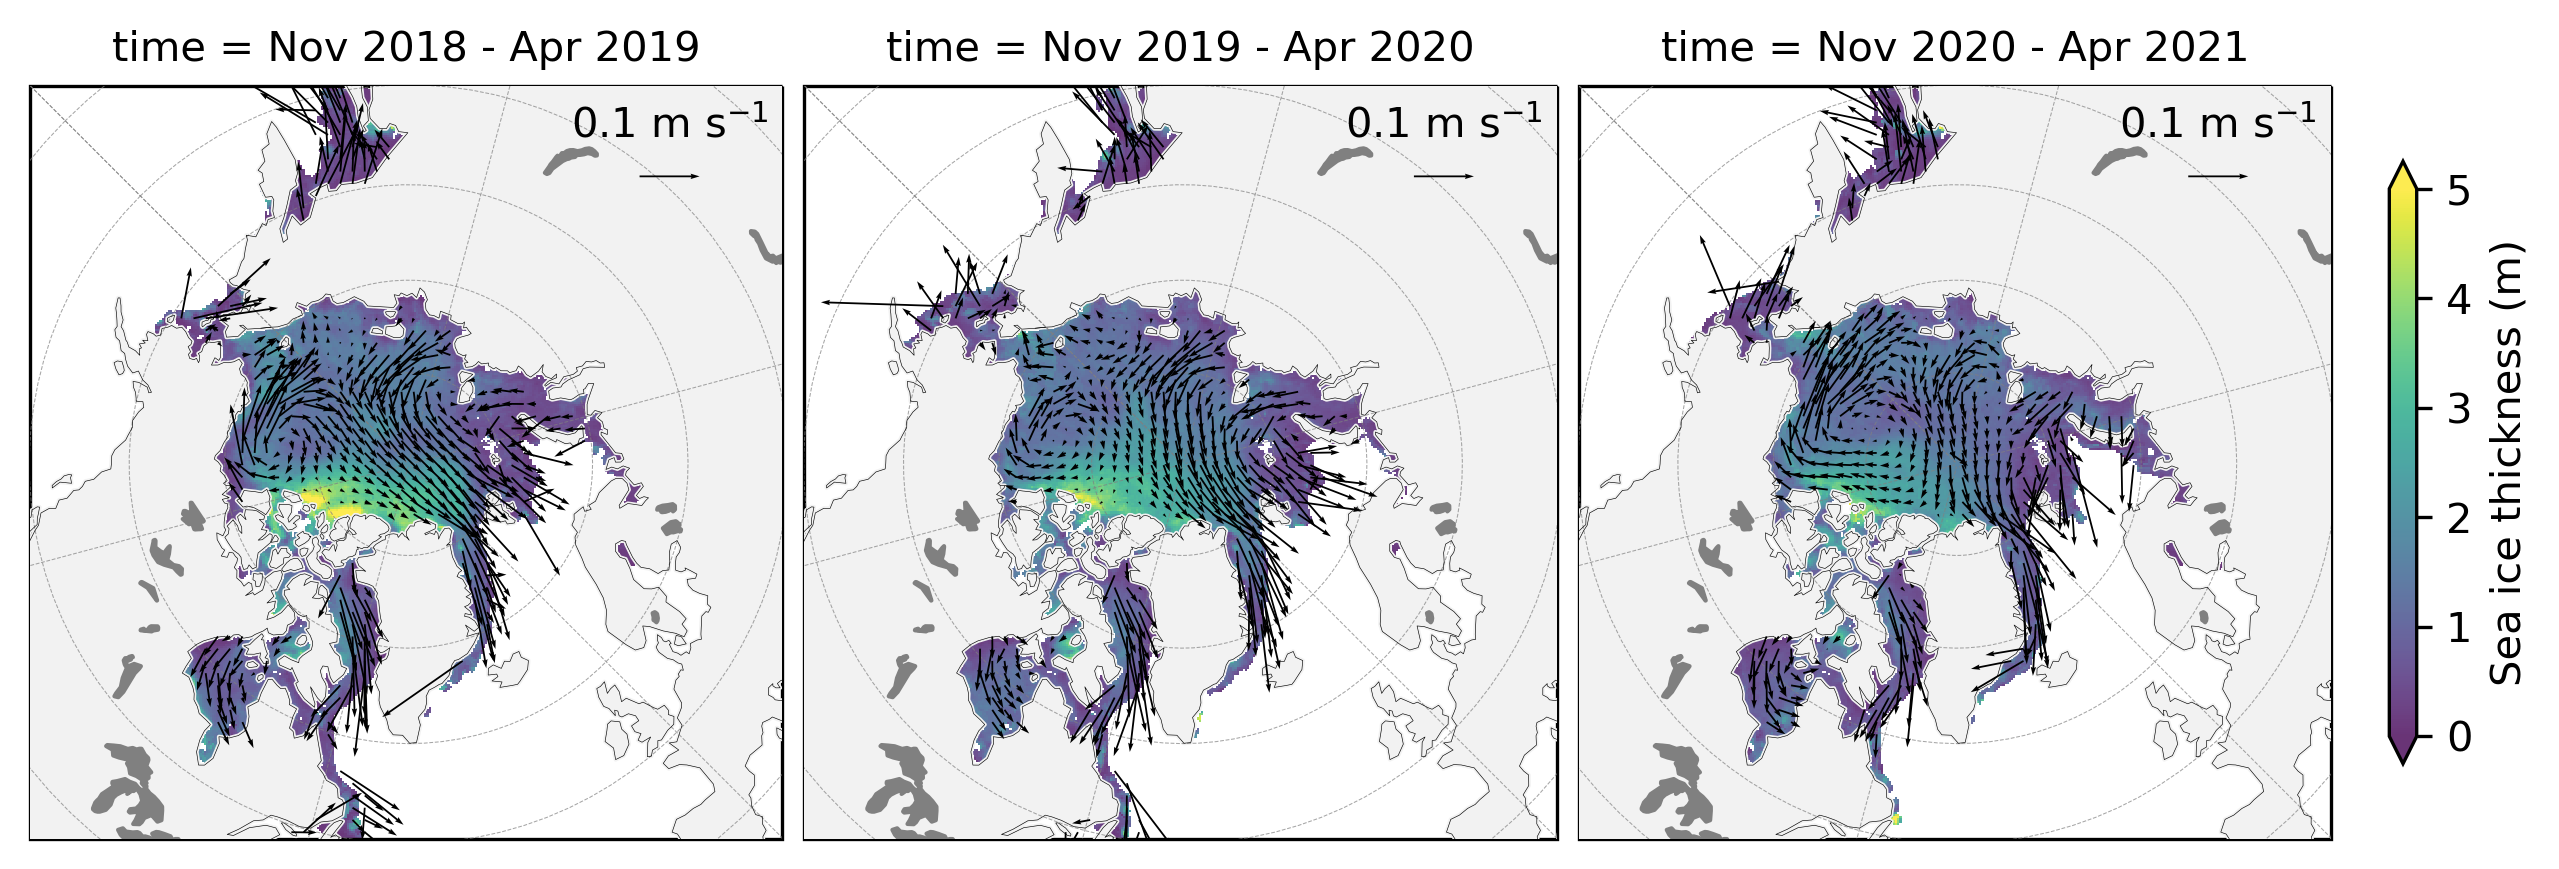

In [8]:
# Compute winter means 
thickness_winter_means = compute_gridcell_winter_means(book_ds.ice_thickness_int, years=years)
drifts_xvel_winter_means = compute_gridcell_winter_means(book_ds.x_vel, years=years)
drifts_yvel_winter_means = compute_gridcell_winter_means(book_ds.y_vel, years=years)

# Generate plot 
pl_drifts = staticArcticMaps_overlayDrifts(da=thickness_winter_means,
                                           drifts_x=drifts_xvel_winter_means, 
                                           drifts_y=drifts_yvel_winter_means, 
                                           set_cbarlabel="Sea ice thickness (m)", cmap="viridis", 
                                           vmin=0, vmax=5, alpha=0.8, 
                                           out_str='thickness_drifts_overlayed')
display(pl_drifts)

# 6) Thickness anomaly plots
Compute and map (static) monthly anomaly maps (relative to the mean across the three winters by default) for given variables across the three winters

In [ ]:
freeboard_winter_means = compute_gridcell_winter_means(book_ds.freeboard_int, years=years)
pl = staticArcticMaps(freeboard_winter_means-freeboard_winter_means.mean(axis=0), title="", set_cbarlabel = "Sea ice freeboard anomaly (m)", cmap="BrBG", vmin=-0.2, vmax=0.2, out_str='freeboard_winter_anomaly')
display(pl)

In [ ]:
snow_depth_winter_means = compute_gridcell_winter_means(book_ds.snow_depth_int, years=years)
pl = staticArcticMaps(snow_depth_winter_means-snow_depth_winter_means.mean(axis=0), set_cbarlabel = "Snow depth anomaly (m)", cmap="PRGn", vmin=-0.2, vmax=0.2, out_str='snowdepth_winter_anomaly')
display(pl)

In [ ]:
thickness_winter_means = compute_gridcell_winter_means(book_ds.ice_thickness_int, years=years)
pl = staticArcticMaps(thickness_winter_means-thickness_winter_means.mean(axis=0), set_cbarlabel = "Sea ice thickness anomaly (m)", cmap="RdBu", vmin=-1.5, vmax=1.5, out_str='thickness_winter_anomaly')
display(pl)

Do the same for the monthly anomalies (November then April)

In [ ]:
pl = staticArcticMaps(book_ds.freeboard_int[0::12]-book_ds.freeboard_int[0::12].mean(axis=0), set_cbarlabel = "Sea ice freeboard anomaly (m)", cmap="BrBG", vmin=-0.2, vmax=0.2, out_str='freeboard_november_anomaly')
display(pl)

In [ ]:
pl = staticArcticMaps(book_ds.snow_depth_int[0::12]-book_ds.snow_depth_int[0::12].mean(axis=0), set_cbarlabel = "Snow depth anomaly (m)", cmap="PRGn", vmin=-0.2, vmax=0.2, out_str='snow_depth_november_anomaly')
display(pl)

In [ ]:
pl = staticArcticMaps(book_ds.ice_thickness_int[5::12]-book_ds.ice_thickness_int[5::12].mean(axis=0), set_cbarlabel = "Sea ice thickness anomaly (m)", cmap="RdBu", vmin=-1.5, vmax=1.5, out_str='thickness_november_anomaly')
display(pl)

In [ ]:
pl = staticArcticMaps(book_ds.freeboard_int[5::12]-book_ds.freeboard_int[5::12].mean(axis=0), set_cbarlabel = "Sea ice freeboard anomaly (m)", cmap="BrBG", vmin=-0.2, vmax=0.2, out_str='freeboard_april_anomaly')
display(pl)

In [ ]:
pl = staticArcticMaps(book_ds.snow_depth_int[5::12]-book_ds.snow_depth_int[5::12].mean(axis=0), set_cbarlabel = "Snow depth anomaly (m)", cmap="PRGn", vmin=-0.2, vmax=0.2, out_str='snow_depth_april_anomaly')
display(pl)

In [ ]:
pl = staticArcticMaps(book_ds.ice_thickness_int[5::12]-book_ds.ice_thickness_int[5::12].mean(axis=0), set_cbarlabel = "Sea ice thickness anomaly (m)", cmap="RdBu", vmin=-1.5, vmax=1.5, out_str='thickness_april_anomaly')
display(pl)

# 7) Monthly mean timeseries 
Next we'll compute monthly means by averaging over all gridcells within a given region. We'll use this to generate a lineplot to compare across the three winter seasons for each variable.

In [ ]:
# Here is where we might also want to set a region mask, e.g. to avoid including some of the more uncertain data in the peripheral seas
innerArctic = [1,2,3,4,5,6]
book_ds_innerArctic = book_ds.where(book_ds.region_mask.isin(innerArctic))
region_str='Inner Arctic'

In [ ]:
print(static_winter_comparison_lineplot.__doc__) # Print docstring

In [ ]:
static_winter_comparison_lineplot(book_ds_innerArctic.freeboard, years=years, figsize=(5,3), set_ylabel=r'Sea ice freeboard (m)', region_str=region_str, legend=True)

In [ ]:
static_winter_comparison_lineplot(book_ds_innerArctic.snow_depth_int, years=years, figsize=(5,3), set_ylabel='Snow depth (m)', region_str=region_str, legend=False)

In [ ]:
static_winter_comparison_lineplot(book_ds_innerArctic.snow_density, years=years, figsize=(5,3), set_ylabel=r'Snow density (kg/m$^3$)', region_str=region_str, legend=False)

In [ ]:
static_winter_comparison_lineplot(book_ds_innerArctic.ice_type, years=years, figsize=(5,3), set_ylabel='Multi-year ice fraction', region_str=region_str, legend=False)

In [ ]:
static_winter_comparison_lineplot(book_ds_innerArctic.ice_thickness_int, da_unc = book_ds.ice_thickness_unc, years=years, figsize=(5,3), set_ylabel='Sea ice thickness (m)', region_str=region_str, legend=False)

In [ ]:
static_winter_comparison_lineplot(book_ds_innerArctic.sea_ice_conc, years=years, figsize=(5,3), set_ylabel='Sea ice concentration', region_str=region_str, legend=False)

Let's take things a bit further and set some conditions on the plots. Storing our data in an xarray dataset makes this very easy!

In [ ]:
# Produce timeseries just using grid-cells of multi-year ice type (ice_type =1)

out = book_ds_innerArctic.ice_thickness_int.where(book_ds_innerArctic.ice_type==1)

static_winter_comparison_lineplot(out, title="(a) Multiyear ice", years=years, figsize=(5,3), start_month="Nov", set_ylabel='Sea ice thickness (m)', region_str=region_str+'_myi', legend=True)

In [ ]:
# Produce timeseries just using grid-cells of first-year ice type (ice_type = 0)

out = book_ds_innerArctic.ice_thickness_int.where(book_ds_innerArctic.ice_type==0)

static_winter_comparison_lineplot(out, years=years, figsize=(5,3), title="(b) First-year ice", start_month="Nov", set_ylabel='Sea ice thickness (m)', region_str=region_str+'_fyi', legend=False)

Play around with some other conditions and see how things look!